# **생능 출판사 "으뜸 머신러닝"(1판) 교재의 소스 코드**
# *10장 순환신경망*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 으뜸 파이썬 저자 : 강영민, 박동규, 김성수
*  소스코드 저장소 : https://github.com/dknife/ML
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.
---

### 10.4 텐서플로를 이용하여 단순 RNN 모델 만들기

In [173]:
import numpy as np

size, seq_len = 100, 3

# 비어있는 넘파이 배열을 생성한다. (size, seq_len, channel)
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

for i in range(size):
    # [0, 0.1, 0.2], [0.1, 0.2, 0.3] 같은 시퀀스를 만든다
    c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
    X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
    Y[i] = (i+seq_len) / 10   # 목표값을 생성함

for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

In [174]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20,                               # units는 SimpleRNN 레이어에 있는 뉴런의 수
                              return_sequences=False,                   # return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
                                                                        # (하나의 층으로 구성되어 있기 때문에 이전 시퀀스가 다음 시퀀스에 영향을 주지 않도록 설정)
                              input_shape=[3, 1]),                      # input_shape [3, 1]에서 3는 timesteps, 1은 입력차원
    tf.keras.layers.Dense(1)
])

model.compile(optimizer ='adam', loss = 'mse')

model.summary()                                                         # return_sequences를 False로 설정하였기에 output shape은 (batch_size, units)
                                                                        # simple_rnn_10 Param # : (unit * unit) + (input + unit) + (bias * unit) = 20 * 20 + 1 * 20 + 1 * 20 = 440

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_32 (SimpleRNN)   (None, 20)                440       
                                                                 
 dense_38 (Dense)            (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


### 10.5 RNN을 학습시켜 예측을 해 보자.

In [175]:
import matplotlib.pyplot as plt

history = model.fit(X, Y, epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 5ms/step - loss: 26.5519
Epoch 2/300
4/4 [==============================] - 0s 5ms/step - loss: 24.6282
Epoch 3/300
4/4 [==============================] - 0s 5ms/step - loss: 22.8991
Epoch 4/300
4/4 [==============================] - 0s 5ms/step - loss: 21.3250
Epoch 5/300
4/4 [==============================] - 0s 5ms/step - loss: 19.9429
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 18.7237
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 17.6382
Epoch 8/300
4/4 [==============================] - 0s 5ms/step - loss: 16.6829
Epoch 9/300
4/4 [==============================] - 0s 5ms/step - loss: 15.7681
Epoch 10/300
4/4 [==============================] - 0s 5ms/step - loss: 14.9671
Epoch 11/300
4/4 [==============================] - 0s 5ms/step - loss: 14.2138
Epoch 12/300
4/4 [==============================] - 0s 6ms/step - loss: 13.5481
Epoch 13/300
4/4 [==============================]

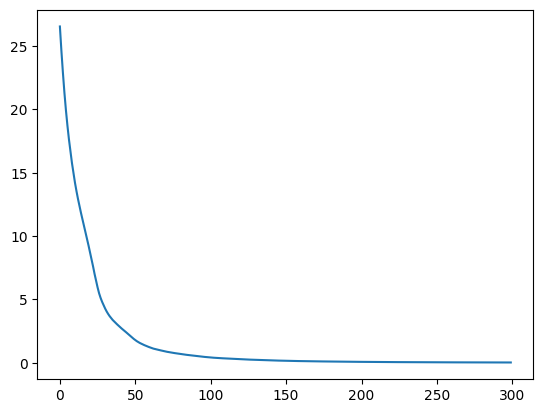

4/4 [==============================] - 0s 5ms/step


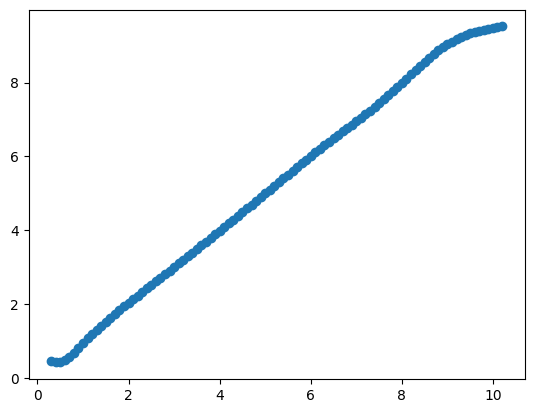

In [176]:
plt.plot(history.history['loss'])
plt.show()

y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [177]:
print(model.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 21ms/step
[[9.558898]]
1/1 [==============================] - 0s 25ms/step
[[9.57799]]


In [178]:
# 유닛의 수를 256개로 대폭 늘여서 개선된 모델
model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False, input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model256.compile(optimizer ='adam', loss = 'mse')

model256.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_33 (SimpleRNN)   (None, 256)               66048     
                                                                 
 dense_39 (Dense)            (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 1s 7ms/step - loss: 13.9224
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 3.8661
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 2.4605
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 2.0047
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1956
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 0.8195
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 0.4842
Epoch 8/300
4/4 [==============================] - 0s 8ms/step - loss: 0.3057
Epoch 9/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1779
Epoch 10/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1580
Epoch 11/300
4/4 [==============================] - 0s 8ms/step - loss: 0.1153
Epoch 12/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0961
Epoch 13/300
4/4 [==============================] - 0s 7ms/s

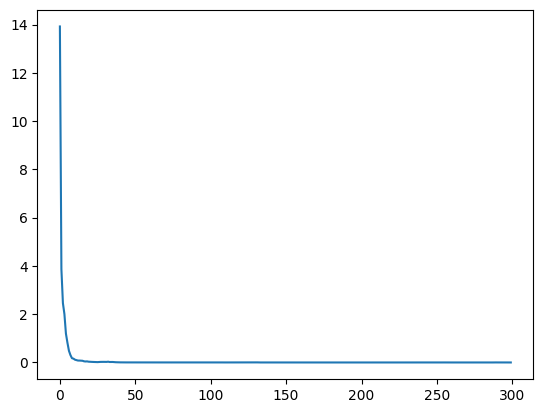

In [179]:
history = model256.fit(X, Y, epochs=300)

plt.plot(history.history['loss'])

4/4 [==============================] - 0s 4ms/step


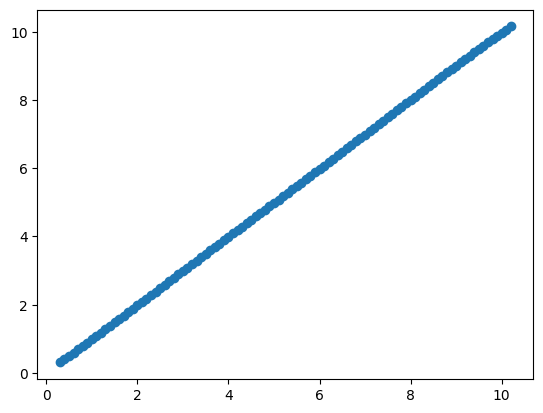

In [180]:
y_hat = model256.predict(X)

plt.scatter(Y, y_hat)

In [181]:
print(model256.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model256.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 27ms/step
[[10.422425]]
1/1 [==============================] - 0s 25ms/step
[[10.594558]]


### 10.6 RNN을 다층구조로 만들어 적은 수의 파라미터로 좋은 성능을 내자

In [182]:
import tensorflow as tf

model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3, 1],
                                          return_sequences=True),                   # 시퀀스가 다층으로 구성되어 있기 때문에 이전 시퀀스가 다음 시퀀스에 영향을 주도록 설정
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) ])

model_multilayer.summary()                                                          # return_sequences를 True로 설정하였기에 output shape은 (batch_size, timesteps, units)
                                                                                    # sequence의 영향을 받는 simple_rnn_22 Param # : 34 * 34 + 34 * 34 + 1 * 34 = 2346

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_34 (SimpleRNN)   (None, 3, 34)             1224      
                                                                 
 simple_rnn_35 (SimpleRNN)   (None, 3, 34)             2346      
                                                                 
 simple_rnn_36 (SimpleRNN)   (None, 3, 34)             2346      
                                                                 
 simple_rnn_37 (SimpleRNN)   (None, 34)                2346      
                                                                 
 dense_40 (Dense)            (None, 1)                 35        
                                                                 
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________


In [183]:
model_multilayer.compile(optimizer ='adam', loss = 'mse')

history = model_multilayer.fit(X, Y, epochs=300)

Epoch 1/300
4/4 [==============================] - 4s 8ms/step - loss: 30.5785
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 14.2208
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 8.9064
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 7.0115
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 6.0934
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 5.4540
Epoch 7/300
4/4 [==============================] - 0s 8ms/step - loss: 4.7867
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 4.0625
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 3.3156
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 2.7486
Epoch 11/300
4/4 [==============================] - 0s 7ms/step - loss: 2.2308
Epoch 12/300
4/4 [==============================] - 0s 7ms/step - loss: 1.8617
Epoch 13/300
4/4 [==============================] - 0s 7ms/

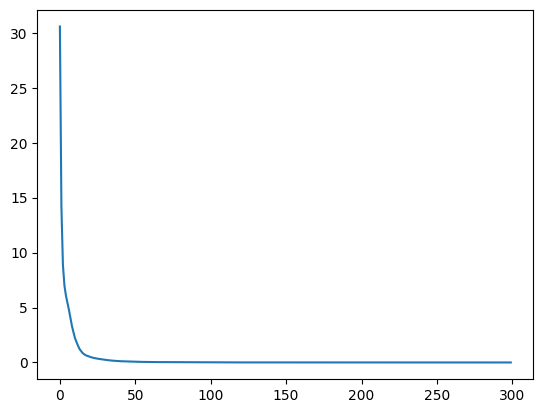

In [184]:
plt.plot(history.history['loss'])

4/4 [==============================] - 1s 5ms/step


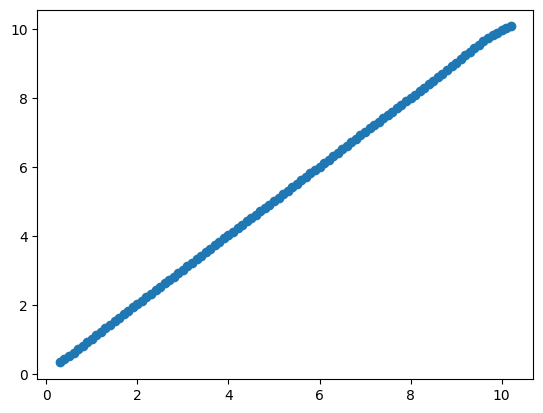

In [185]:
y_hat = model_multilayer.predict(X)

plt.scatter(Y, y_hat)

In [186]:
print(model_multilayer.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model_multilayer.predict(np.array([[[10.4], [10.5], [10.6]]])))

1/1 [==============================] - 0s 22ms/step
[[10.187453]]
1/1 [==============================] - 0s 22ms/step
[[10.2380295]]


### 10.12 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 시퀀스 데이터 준비

In [230]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [231]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('')
print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3

검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### 10.13 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 성능 비교

In [232]:
import tensorflow as tf

n_units = 256
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences=False, input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer ='adam', loss = 'mse')

simpleRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.5395
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3408
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2195
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.0100
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 0.1765
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1228
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0142
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0161
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.0672
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.0604
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 0.0142
Epoch 12/100
1/1 [==============================] - 0s 17ms/step - loss: 0.0042
Epoch 13/100
1/1 [==============================] -

In [233]:
simpleRNN_model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_41 (SimpleRNN)   (None, 256)               66048     
                                                                 
 dense_50 (Dense)            (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


In [234]:
result = simpleRNN_model.predict(test_seq_X)
result = result.flatten()

print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 0s 163ms/step
예측값 : [2.4794784 2.5406797 2.598406  2.6529827]
실제값 : [2.6 2.7 2.8 2.9]


In [235]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = n_units, return_sequences=False, input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')

LSTM_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.7590
Epoch 2/100
1/1 [==============================] - 0s 80ms/step - loss: 2.6414
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 1.6869
Epoch 4/100
1/1 [==============================] - 0s 89ms/step - loss: 0.8647
Epoch 5/100
1/1 [==============================] - 0s 101ms/step - loss: 0.2310
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0414
Epoch 7/100
1/1 [==============================] - 0s 97ms/step - loss: 0.5134
Epoch 8/100
1/1 [==============================] - 0s 84ms/step - loss: 0.4382
Epoch 9/100
1/1 [==============================] - 0s 93ms/step - loss: 0.1455
Epoch 10/100
1/1 [==============================] - 0s 91ms/step - loss: 0.0136
Epoch 11/100
1/1 [==============================] - 0s 180ms/step - loss: 0.0317
Epoch 12/100
1/1 [==============================] - 0s 115ms/step - loss: 0.1019
Epoch 13/100
1/1 [==============================

In [236]:
LSTM_model.summary()                        # LSTM Param # : 4 * ((input + 1(bias)) * output + output^2) = 4 ((1+1)) * 256 + 256^2) = 264192

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 256)               264192    
                                                                 
 dense_51 (Dense)            (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [237]:
result = LSTM_model.predict(test_seq_X)
result = result.flatten()

print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 0s 443ms/step
예측값 : [2.5734775 2.6587312 2.741277  2.8211663]
실제값 : [2.6 2.7 2.8 2.9]


In [238]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False, input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer ='adam', loss = 'mse')

GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 4.0103
Epoch 2/100
1/1 [==============================] - 0s 80ms/step - loss: 2.9868
Epoch 3/100
1/1 [==============================] - 0s 71ms/step - loss: 2.1020
Epoch 4/100
1/1 [==============================] - 0s 68ms/step - loss: 1.3398
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 0.7044
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2313
Epoch 7/100
1/1 [==============================] - 0s 68ms/step - loss: 0.0056
Epoch 8/100
1/1 [==============================] - 0s 64ms/step - loss: 0.1493
Epoch 9/100
1/1 [==============================] - 0s 88ms/step - loss: 0.4203
Epoch 10/100
1/1 [==============================] - 0s 74ms/step - loss: 0.4139
Epoch 11/100
1/1 [==============================] - 0s 70ms/step - loss: 0.2513
Epoch 12/100
1/1 [==============================] - 0s 67ms/step - loss: 0.1021
Epoch 13/100
1/1 [==============================] -

In [239]:
GRU_model.summary()             # GRU Param # : 3(input * output + 2 * output + output^2) = 3(1 * 256 + 2 * 256 + 256^2) = 198912

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 256)               198912    
                                                                 
 dense_52 (Dense)            (None, 1)                 257       
                                                                 
Total params: 199,169
Trainable params: 199,169
Non-trainable params: 0
_________________________________________________________________


In [240]:
result = GRU_model.predict(test_seq_X)
result = result.flatten()

print('예측값 :', result)
print('실제값 :', test_Y)

1/1 [==============================] - 1s 665ms/step
예측값 : [2.5724783 2.6654637 2.757757  2.8493478]
실제값 : [2.6 2.7 2.8 2.9]


### LAB 10-1 비선형 시퀀스를 순환신경망으로 예측하자

In [241]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 100, 10

# 비어있는 넘파이 배열을 생성한다. (1차원 배열)
seq_X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [242]:
# sine 곡선에서 잘라낼 구간 설정 (즉, interval 지정)
interval = np.linspace(0.0, 2.5, seq_len+1)

In [243]:
shift = np.random.randn(size)           # 시퀀스 추출에 사용할 구간을 옮겨 놓는 값

# 시퀀스에 대한 시작값을 random하게 지정
for i in range(size):
    seq_X[i,:,:] = np.sin(shift[i] + interval[:-1]).reshape(seq_len, 1)
    Y[i] = np.sin(shift[i] + interval[-1])

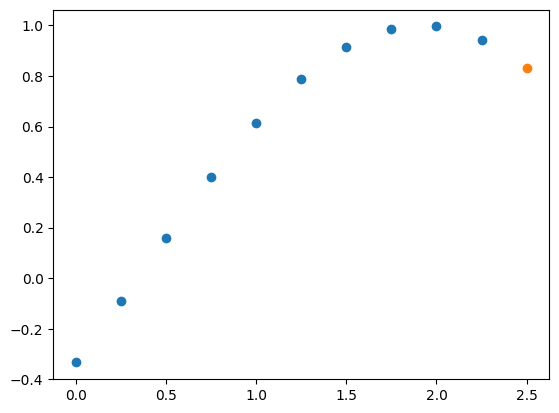

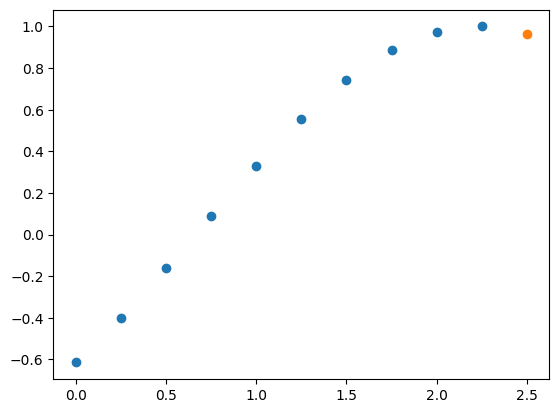

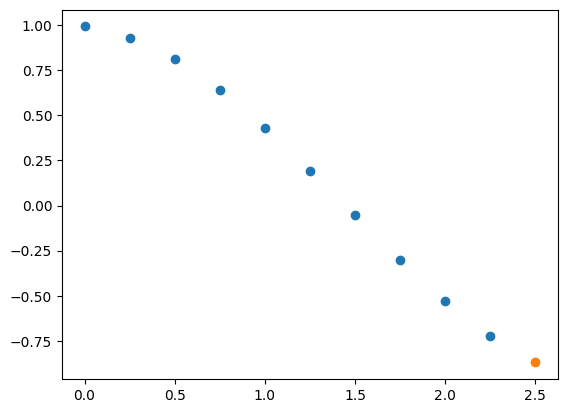

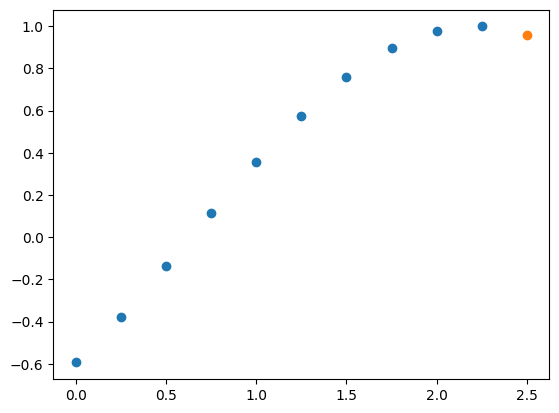

In [244]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :,:])
    plt.scatter(interval[-1], Y[i])
    plt.show()

In [245]:
# 애초에 시퀀스의 시작점을 random하게 잡았기 때문에 다시 shuffle해줄 필요 없음

train_X = seq_X[:80]
train_y = Y[:80]

test_X = seq_X[80:]
test_y = Y[80:]

In [246]:
import tensorflow as tf

simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False, input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')

simpleRNN_model.summary()                                           # SimpleRNN Param # : m*m + 2m = 120
                                                                    # Dense Param # : m + 1(bias) = 11

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_42 (SimpleRNN)   (None, 10)                120       
                                                                 
 dense_53 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [247]:
history = simpleRNN_model.fit(train_X, train_y, epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 7ms/step - loss: 0.0064
Epoch 2/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0059
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 4/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0046
Epoch 5/50
3/3 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 11/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0018
Epoch 12/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 13/50
3/3 [==============================] - 0s 9ms/step - loss:

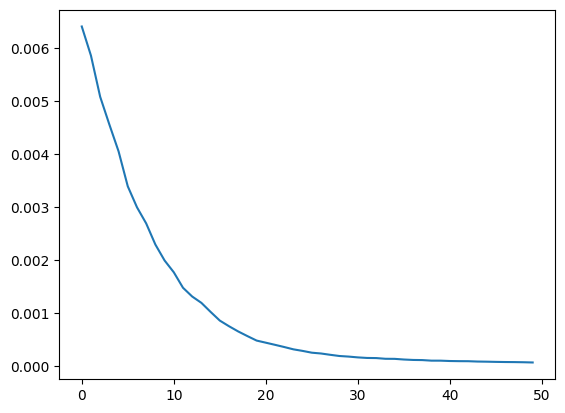

In [248]:
plt.plot(history.history['loss'])

3/3 [==============================] - 0s 5ms/step


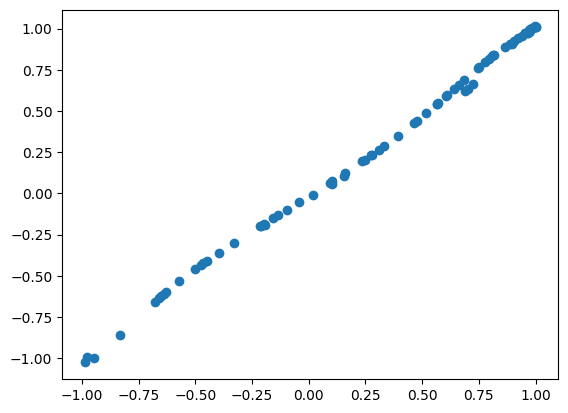

1/1 [==============================] - 0s 23ms/step


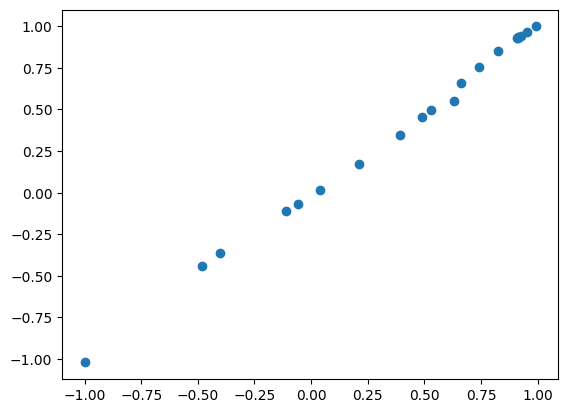

In [202]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()

test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

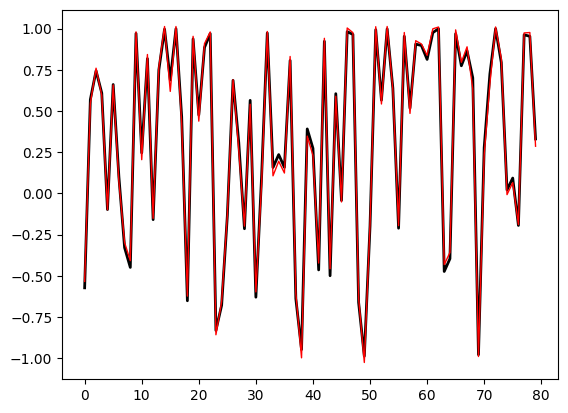

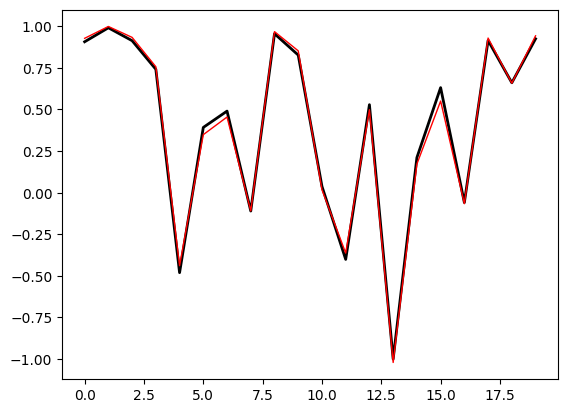

In [203]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()

plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)
plt.show()

In [252]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False, input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')

LSTM_model.summary()                                        # LSTM Param # : 4((input + 1(bias))m + m*m) = 480

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 10)                480       
                                                                 
 dense_55 (Dense)            (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [253]:
history = LSTM_model.fit(train_X, train_y, epochs=50)

Epoch 1/50
3/3 [==============================] - 2s 9ms/step - loss: 0.3168
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2980
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2806
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2676
Epoch 5/50
3/3 [==============================] - 0s 10ms/step - loss: 0.2545
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2434
Epoch 7/50
3/3 [==============================] - 0s 12ms/step - loss: 0.2351
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2266
Epoch 9/50
3/3 [==============================] - 0s 12ms/step - loss: 0.2189
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 0.2124
Epoch 11/50
3/3 [==============================] - 0s 9ms/step - loss: 0.2057
Epoch 12/50
3/3 [==============================] - 0s 9ms/step - loss: 0.1993
Epoch 13/50
3/3 [==============================] - 0s 11ms/step - loss

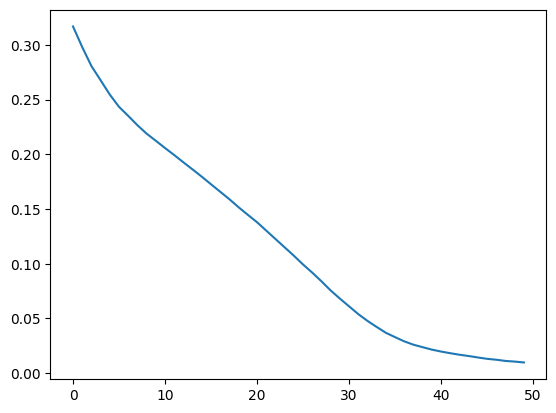

In [254]:
plt.plot(history.history['loss'])

3/3 [==============================] - 0s 4ms/step


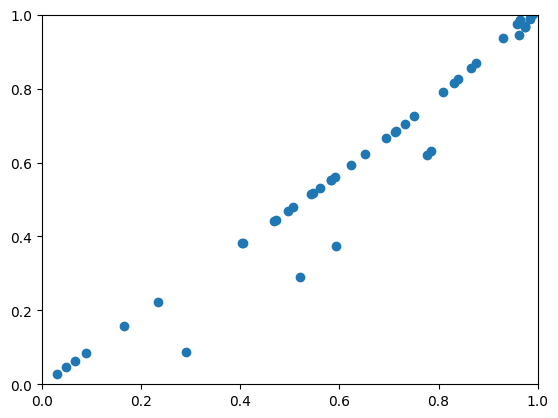

1/1 [==============================] - 0s 22ms/step


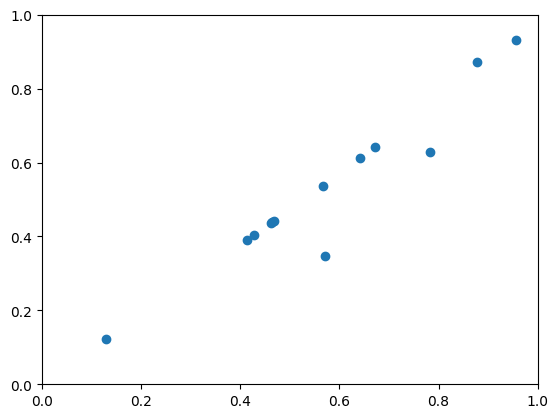

In [255]:
train_y_hat = LSTM_model.predict(train_X)
plt.xlim([0,1])
plt.ylim([0,1])
plt.scatter(train_y, train_y_hat)
plt.show()

plt.xlim([0,1])
plt.ylim([0,1])
test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

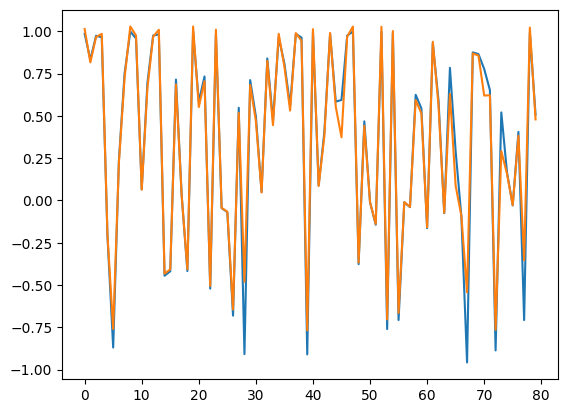

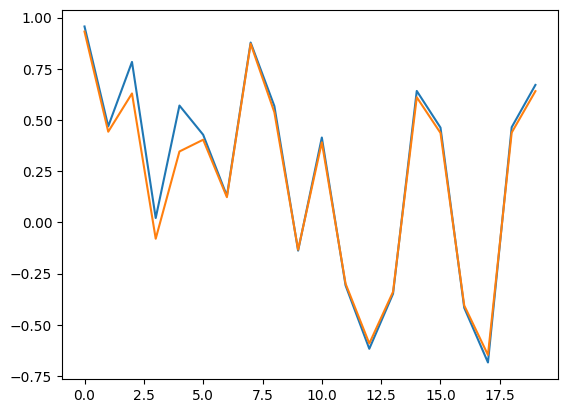

In [256]:
# 생각보다 LSTM의 결과가 아쉬움 -> 하이퍼 파라미터(unit 개수, 등)를 수정하면 결과가 더 나아질 수 있음

plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()

plt.plot(test_y)
plt.plot(test_y_hat)

In [257]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

In [258]:
GRU_model.compile(optimizer ='adam', loss = 'mse')

GRU_model.summary()                                         # GRU Param # : 3((input + 1(bias))m + output + m*m) = 390

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 10)                390       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [259]:
history = GRU_model.fit(train_X, train_y, epochs=50)

Epoch 1/50
3/3 [==============================] - 4s 24ms/step - loss: 0.2320
Epoch 2/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2150
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.2006
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.1887
Epoch 5/50
3/3 [==============================] - 0s 34ms/step - loss: 0.1827
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.1763
Epoch 7/50
3/3 [==============================] - 0s 22ms/step - loss: 0.1707
Epoch 8/50
3/3 [==============================] - 0s 15ms/step - loss: 0.1656
Epoch 9/50
3/3 [==============================] - 0s 14ms/step - loss: 0.1611
Epoch 10/50
3/3 [==============================] - 0s 25ms/step - loss: 0.1566
Epoch 11/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1520
Epoch 12/50
3/3 [==============================] - 0s 16ms/step - loss: 0.1473
Epoch 13/50
3/3 [==============================] - 0s 16ms/st

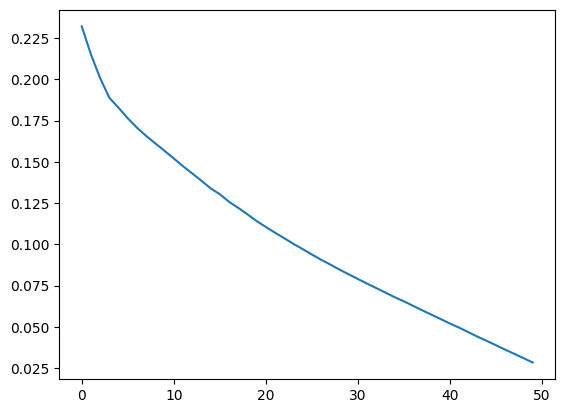

In [260]:
plt.plot(history.history['loss'])
plt.show()

1/1 [==============================] - 0s 36ms/step


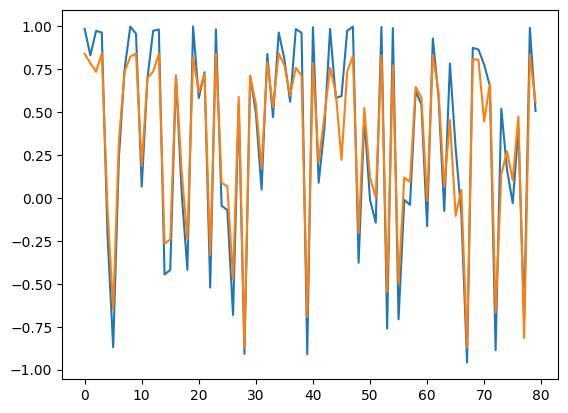

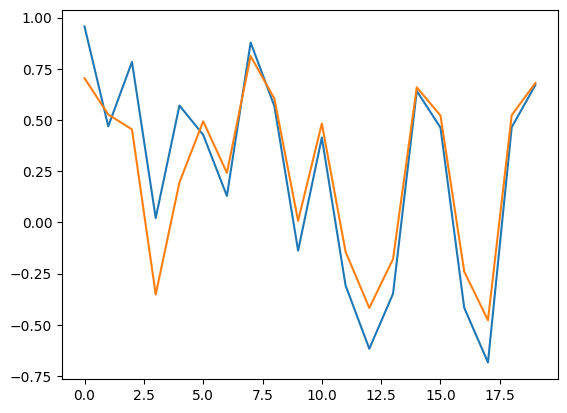

In [261]:
train_y_hat = GRU_model.predict(train_X)
test_y_hat = GRU_model.predict(test_X)

# 생각보다 GRU의 결과가 아쉬움 -> 하이퍼 파라미터(unit 개수, 등)를 수정하면 결과가 더 나아질 수 있음

plt.plot(train_y)
plt.plot(train_y_hat)
plt.show()

plt.plot(test_y)
plt.plot(test_y_hat)
plt.show()

### LAB 10-2 기억이 필요한 시퀀스를 예측해 보자

In [262]:
import numpy as np
import matplotlib.pyplot as plt

size, seq_len = 200, 30
# 비어있는 넘파이 배열을 생성한다.
# 이번에 생성할 데이터는 시퀀스에 인덱스가 있다 (그래서 1차원이던 채널 수도 2차원으로 늘어남)
seq_X = np.empty(shape=(size, seq_len, 2))
Y = np.empty(shape=(size,))

In [263]:
# sine 곡선에서 잘라낼 구간 설정
interval = np.linspace(0.0, 2.5, seq_len+1)

In [264]:
shift = np.random.randn(size)
for i in range(size):  # 시퀀스 내의 각 원소에 대해 인덱스와 값을 설정
    seq_X[i,:,0] = np.random.randint(0, 6, size=(seq_len)) # 인덱스 (값 자체를 랜덤하게 넣는 것은 아니고 지정된 범위 안에서 랜덤하게 지정해주는 것이기에 중복된 index가 있을 수도 있음)
    seq_X[i,:,1] = np.sin(shift[i] + interval[:-1])        # 값

    # label은 시퀀스 내에서 짝수 인덱스를 가진 원소의 값을 모두 더한 값 (정답으로 사용하고자 하는 값)
    even_idx = seq_X[i, seq_X[i,:,0]%2 == 0 ]
    Y[i] = even_idx[:,1].sum()

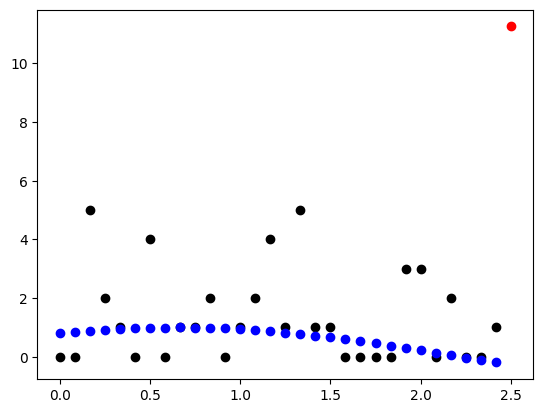

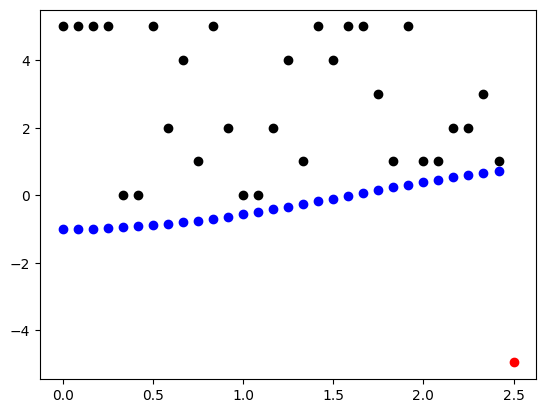

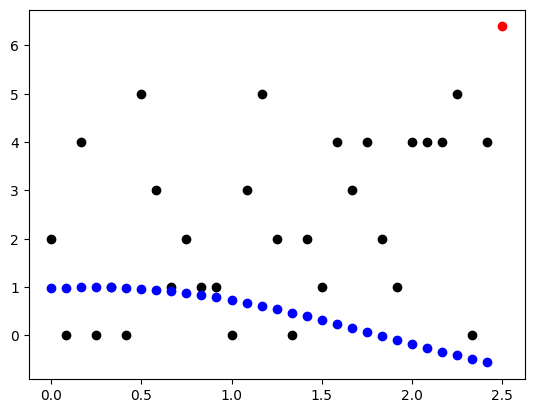

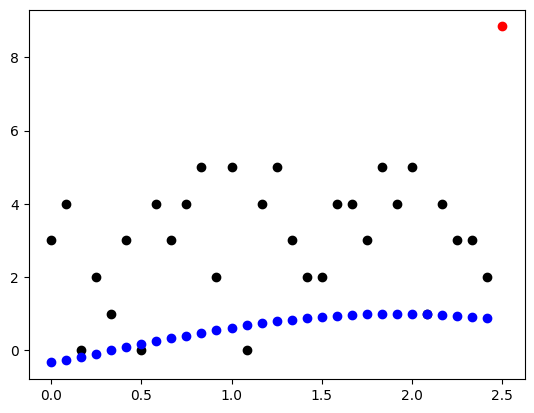

In [265]:
for i in [1, 3, 5, 9]:
    plt.scatter(interval[:-1], seq_X[i, :, 0], color='k')   # 인덱스 정보
    plt.scatter(interval[:-1], seq_X[i, :, 1], color='b')   # 값: 사인 시퀀스
    plt.scatter(interval[-1], Y[i], color='r')
    plt.show()

In [266]:
train_X = seq_X[:180]
train_y = Y[:180]

test_X = seq_X[180:]
test_y = Y[180:]

In [267]:
import tensorflow as tf

simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 10, return_sequences=False, input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])
simpleRNN_model.compile(optimizer ='adam', loss = 'mse')

simpleRNN_model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_43 (SimpleRNN)   (None, 10)                130       
                                                                 
 dense_57 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [268]:
history = simpleRNN_model.fit(train_X, train_y, epochs=150)

Epoch 1/150
6/6 [==============================] - 2s 8ms/step - loss: 75.8305
Epoch 2/150
6/6 [==============================] - 0s 8ms/step - loss: 74.4009
Epoch 3/150
6/6 [==============================] - 0s 15ms/step - loss: 72.9622
Epoch 4/150
6/6 [==============================] - 0s 16ms/step - loss: 71.4980
Epoch 5/150
6/6 [==============================] - 0s 14ms/step - loss: 70.1512
Epoch 6/150
6/6 [==============================] - 0s 15ms/step - loss: 68.8016
Epoch 7/150
6/6 [==============================] - 0s 19ms/step - loss: 67.5579
Epoch 8/150
6/6 [==============================] - 0s 14ms/step - loss: 66.3612
Epoch 9/150
6/6 [==============================] - 0s 8ms/step - loss: 65.2378
Epoch 10/150
6/6 [==============================] - 0s 13ms/step - loss: 64.0939
Epoch 11/150
6/6 [==============================] - 0s 8ms/step - loss: 63.0478
Epoch 12/150
6/6 [==============================] - 0s 15ms/step - loss: 62.0169
Epoch 13/150
6/6 [=======================

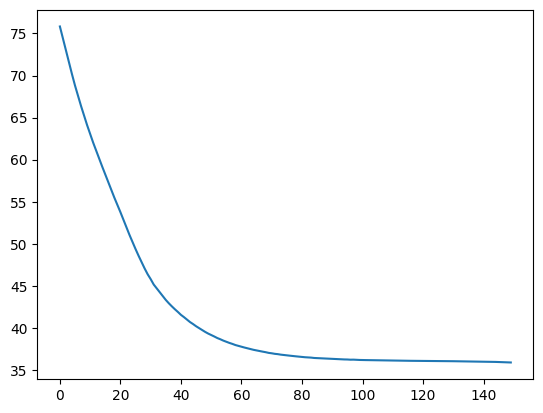

In [269]:
plt.plot(history.history['loss'])

6/6 [==============================] - 0s 4ms/step


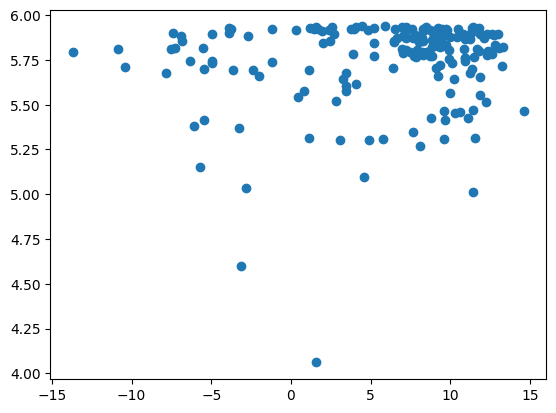

1/1 [==============================] - 0s 24ms/step


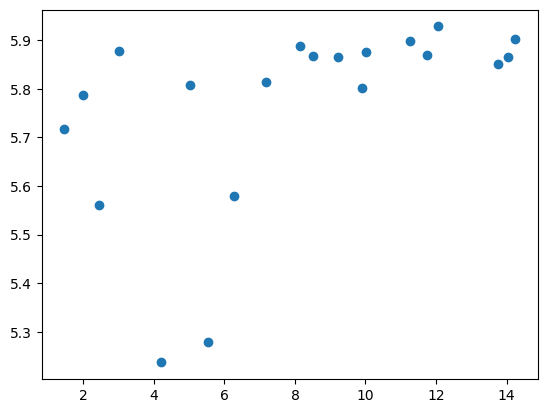

In [270]:
train_y_hat = simpleRNN_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()

test_y_hat = simpleRNN_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

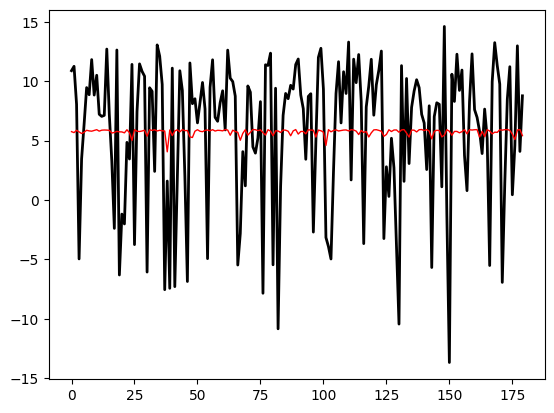

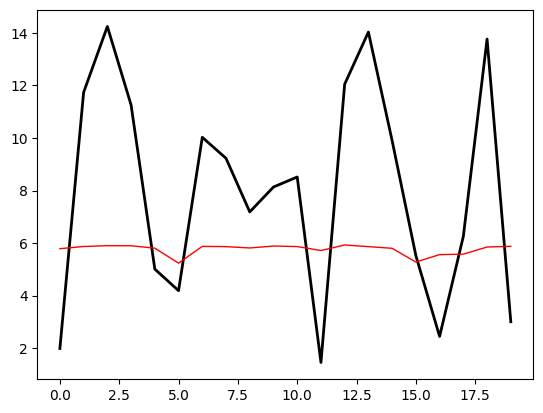

In [271]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()

plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [272]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 10, return_sequences=False, input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer ='adam', loss = 'mse')

LSTM_model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 10)                520       
                                                                 
 dense_58 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [273]:
history = LSTM_model.fit(train_X, train_y, epochs=150)

Epoch 1/150
6/6 [==============================] - 4s 28ms/step - loss: 78.3416
Epoch 2/150
6/6 [==============================] - 0s 27ms/step - loss: 76.7147
Epoch 3/150
6/6 [==============================] - 0s 23ms/step - loss: 75.2127
Epoch 4/150
6/6 [==============================] - 0s 27ms/step - loss: 73.7817
Epoch 5/150
6/6 [==============================] - 0s 23ms/step - loss: 72.5534
Epoch 6/150
6/6 [==============================] - 0s 23ms/step - loss: 71.4243
Epoch 7/150
6/6 [==============================] - 0s 26ms/step - loss: 70.4387
Epoch 8/150
6/6 [==============================] - 0s 17ms/step - loss: 69.5433
Epoch 9/150
6/6 [==============================] - 0s 16ms/step - loss: 68.7478
Epoch 10/150
6/6 [==============================] - 0s 23ms/step - loss: 67.9984
Epoch 11/150
6/6 [==============================] - 0s 25ms/step - loss: 67.3042
Epoch 12/150
6/6 [==============================] - 0s 36ms/step - loss: 66.6438
Epoch 13/150
6/6 [===================

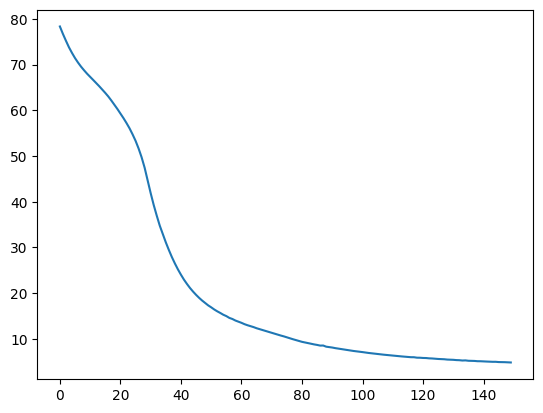

In [274]:
plt.plot(history.history['loss'])

6/6 [==============================] - 0s 5ms/step


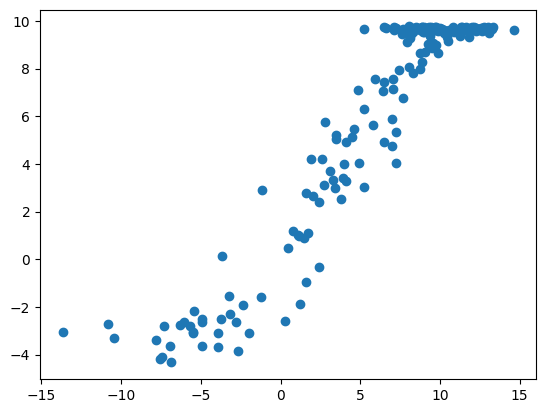

1/1 [==============================] - 0s 43ms/step


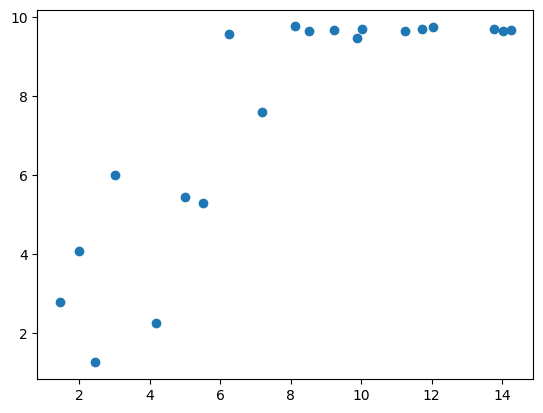

In [275]:
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()

test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

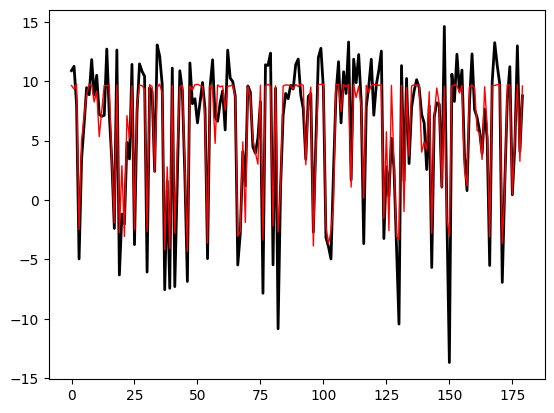

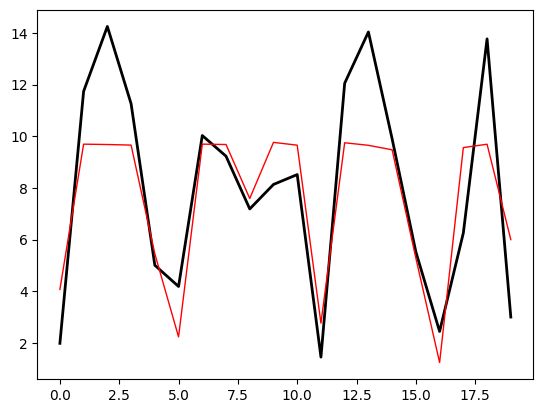

In [276]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()

plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)

In [277]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = 10, return_sequences=False, input_shape=[seq_len, 2]),
    tf.keras.layers.Dense(1)
])

In [278]:
GRU_model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_14 (GRU)                (None, 10)                420       
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 431
Trainable params: 431
Non-trainable params: 0
_________________________________________________________________


In [279]:
GRU_model.compile(optimizer ='adam', loss = 'mse')

GRU_model.fit(train_X, train_y, epochs=150)

Epoch 1/150
6/6 [==============================] - 3s 18ms/step - loss: 75.1128
Epoch 2/150
6/6 [==============================] - 0s 18ms/step - loss: 73.5431
Epoch 3/150
6/6 [==============================] - 0s 20ms/step - loss: 71.8933
Epoch 4/150
6/6 [==============================] - 0s 17ms/step - loss: 70.3326
Epoch 5/150
6/6 [==============================] - 0s 18ms/step - loss: 68.8489
Epoch 6/150
6/6 [==============================] - 0s 18ms/step - loss: 67.2916
Epoch 7/150
6/6 [==============================] - 0s 19ms/step - loss: 65.7633
Epoch 8/150
6/6 [==============================] - 0s 16ms/step - loss: 64.2879
Epoch 9/150
6/6 [==============================] - 0s 20ms/step - loss: 62.8953
Epoch 10/150
6/6 [==============================] - 0s 20ms/step - loss: 61.4428
Epoch 11/150
6/6 [==============================] - 0s 19ms/step - loss: 60.0155
Epoch 12/150
6/6 [==============================] - 0s 17ms/step - loss: 58.6281
Epoch 13/150
6/6 [===================

6/6 [==============================] - 0s 12ms/step


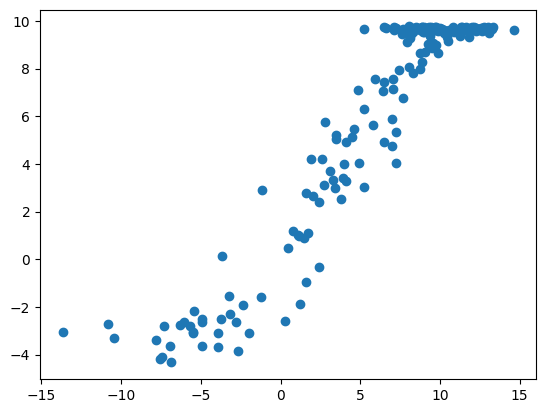

1/1 [==============================] - 0s 199ms/step


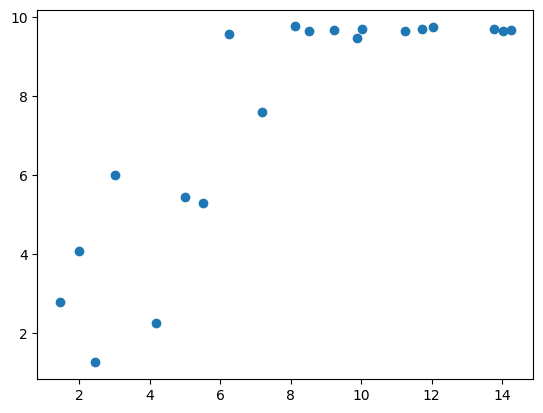

In [280]:
train_y_hat = LSTM_model.predict(train_X)
plt.scatter(train_y, train_y_hat)
plt.show()

test_y_hat = LSTM_model.predict(test_X)
plt.scatter(test_y, test_y_hat)
plt.show()

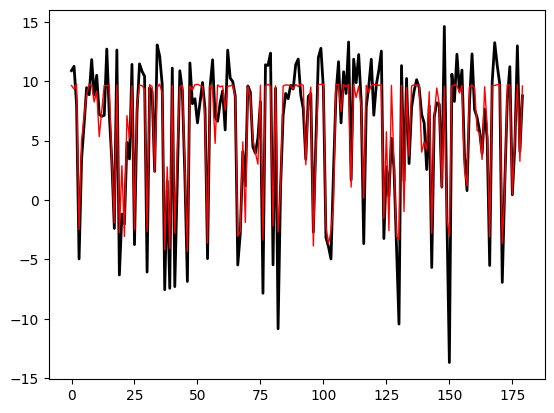

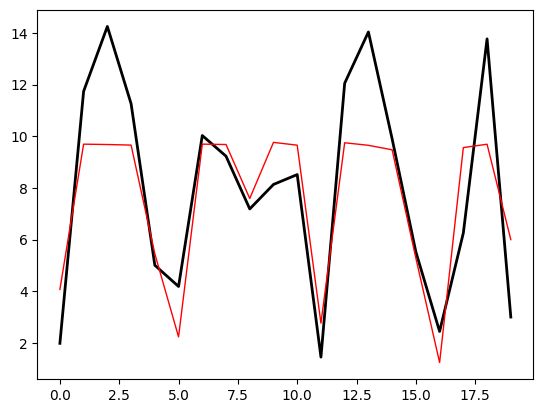

In [281]:
plt.plot(train_y, c='k', linewidth=2)
plt.plot(train_y_hat, c='r', linewidth=1)
plt.show()

plt.plot(test_y, c='k', linewidth=2)
plt.plot(test_y_hat, c='r', linewidth=1)